# Project: TMDB-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id = "intro"></a>
## Introduction

<p>
My analysis is based on the TMDB- movies dataset. This dataset has information about 10,000 movies obtained from The Movie Database (TMDb),which includes,the popularity, types, user ratings and revenue of the individual movie. i'm interested in finding patterns in the dataset.
</p>

<h3>Questions</h3>
<ul>
  <li>Which genres gain more popularity annually?</li>
  <li>What Characteristics Are Associated With High-Profit Movies?</li>
</ul>



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

<p>
  At this point of the analysis, I will be loading the data by reading the dataset using pandas, found out how clean the data is and trim and clean the data if neccessary for analysis.   
</p>

#### Steps Involved:
<ol>
  <li>Load the data</li>
  <li>print out some rows of the data in order to understand what the data contains.</li>
  <li>check the dimension of the data, that is, number of rows and colums of the data</li>
  <li>check the basic information about the data, which includes the data types of the various columns, null values.</li>
  <li>perform basic statistics which provides a concise summary about the data.</li>
</ol>

### General Properties

In [2]:
#load the data using pandas read_csv method
df = pd.read_csv("./tmdb-movies.csv")
#printing the top 5 rows of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#printing the last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# checking the dimension of the data
df.shape

(10866, 21)

In [5]:
#print basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#print concise summary of total data
df.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4             

>After observing the data, the data contains,
<ol>
  <li>10866 rows, 21 columns</li>
  <li>some columns has null values</li>
  <li>some movies have both budget and revenue columns have zero values</li>
</ol>


In [7]:
#count the total number of null values per column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>I'll delete irrelevant data and maintain the crucial datasets after observation and the above-mentioned queries.

### Data Cleaning (Deleting non-essential data from the dataset)




>Data that must be changed or removed
<ol>
<li>Delete duplicated data(rows)</li>
<li>Deleting non-essential columns that are not required throughout the analysis></li>
<li>Converting the released data and release year from object to datetime Format</li>
<li>Delete rows that have values that are inaccurate or improper.</li>
</ol>

In [8]:
#create a copy of the original dataset
# All changes made to the copied data will not be reflected in the orginal data
df_copied = df.copy(deep=True)
df_copied

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


> I made a copy of the dataset so that all changes made to the copied data will not be reflected in the orginal data

><b>1. Check and Remove dupicate rows</b>

In [9]:
# check the number of dupliated data
sum(df_copied.duplicated())

1

In [10]:
#delete duplicated rows from the dataset
df_copied.drop_duplicates(inplace=True)
sum(df_copied.duplicated())

0

In [11]:
#shape after droping the duplicate rows
df_copied.shape

(10865, 21)

<b>2. Deleting non-essential columns that are not required throughout the analysis</b>

In [12]:
df_copied.drop(["imdb_id","cast","homepage","tagline","keywords","overview","budget_adj","revenue_adj"],axis=1, inplace=True)
df_copied.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


<b> 3. Converting the released data and release year from object to datetime Format  </b>

In [13]:
# change the data type of release date to datatime format
df_copied["release_date"] =  pd.to_datetime(df_copied["release_date"])

In [14]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
dtypes: datetime64[ns

<b>4. Delete rows that have values that are inaccurate or improper.</b>

In [15]:
#check the number of rows that have budget column to be zero(0)
print(df_copied[df_copied["budget"]==0].shape[0])
#check the number of rows that have revenue column to be zero(0)
print(df_copied[df_copied["revenue"]==0].shape[0])

5696
6016


In [16]:
#filter for data that have the budget column to be zero
df_copied[df_copied['budget'] == 0]
#delete those rows with budget column equal to zero
df_copied.drop(df_copied.index[df_copied['budget'] == 0], inplace=True)

In [17]:
#filter for data that have the revenue column to be zero
df_copied[df_copied['revenue'] == 0]
#delete those rows with revenue column equal to zero
df_copied.drop(df_copied.index[df_copied['revenue'] == 0], inplace=True)

In [18]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   int64         
 3   revenue               3854 non-null   int64         
 4   original_title        3854 non-null   object        
 5   director              3853 non-null   object        
 6   runtime               3854 non-null   int64         
 7   genres                3854 non-null   object        
 8   production_companies  3808 non-null   object        
 9   release_date          3854 non-null   datetime64[ns]
 10  vote_count            3854 non-null   int64         
 11  vote_average          3854 non-null   float64       
 12  release_year          3854 non-null   int64         
dtypes: datetime64[ns]

In [19]:
df_copied.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


> After accessing,gathering and cleaning the data, I will move on to investigate the data based on the questions stated in the introductory section.

<a id='eda'></a>
## Exploratory Data Analysis
>

### Research Question 1: Which genres gain more popularity annually?

In [20]:
genre_i = list(map(str,(df_copied["genres"])))

genre = ['Action','Adventure', 'Science Fiction', 'Thriller','Fantasy', 'Crime', 'Western', 'Family','Documentary', 'Animation','War','Mystery','Romance','TV Movie','Comedy','Drama' , 'History', 'Music', 'Horror','Foreign','nan']

year = np.array(df_copied['release_year'])
popularity = np.array(df_copied['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

i = 0
for j in genre_i:
    genre_s = list(map(str,j.split('|')))
    print()
    popularity_df.loc[genre_s, year[i]] = popularity_df.loc[genre_s, year[i]] + popularity[i]
    print(popularity_df.loc[genre_s, year[i]])
    i+=1


Action             32.985763
Adventure          32.985763
Science Fiction    32.985763
Thriller           32.985763
Name: 2015, dtype: float64

Action             61.405699
Adventure          61.405699
Science Fiction    61.405699
Thriller           61.405699
Name: 2015, dtype: float64

Adventure          74.518206
Science Fiction    74.518206
Thriller           74.518206
Name: 2015, dtype: float64

Action             72.578803
Adventure          85.691310
Science Fiction    85.691310
Fantasy            11.173104
Name: 2015, dtype: float64

Action      81.913817
Crime        9.335014
Thriller    83.853220
Name: 2015, dtype: float64

Western       9.11070
Drama         9.11070
Adventure    94.80201
Thriller     92.96392
Name: 2015, dtype: float64

Science Fiction     94.345669
Action              90.568176
Thriller           101.618279
Adventure          103.456369
Name: 2015, dtype: float64

Drama               16.778100
Adventure          111.123769
Science Fiction    102.013069
Name

##### Note on the above cell
>I started  by spliting and converting the genre columns details into a list. This is because a single movie an be categorized into different genres and to get rid of the "|" that seperate them.
>I went on to create a dataframe that contains the unique genres and the popularity of the movie.
>Below function, compute the standard deviation of the individual genres according to the year. it assume to be the actual popularity of the genre. 

In [21]:
# find the standard divation of the popularity for the various genres
def calculate_std(data):
    return (data-data.mean())/data.std(ddof=0)

popularGenre = calculate_std(popularity_df)
popularGenre.head(5)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.570144,-0.159388,1.909271,1.538130,1.022476,1.665470,1.825309,1.099875,0.100068,1.308705,...,1.038364,1.291947,1.933816,1.548770,1.873668,1.971916,2.003385,1.921700,2.123221,1.903567
Adventure,0.705931,1.437183,2.710171,1.923461,1.022476,1.665470,1.132612,2.442594,2.298155,1.999674,...,0.900711,0.708729,1.142679,1.369903,1.437511,0.922247,1.173972,1.315606,1.641152,1.891133
Science Fiction,-0.717114,-0.762280,-0.623943,-0.750602,-0.911998,-0.781827,0.029983,-0.831207,1.984656,-0.686877,...,-0.259892,-0.373561,0.199341,0.989288,0.032293,0.398418,0.396839,0.805604,1.256819,1.437719
Thriller,1.267074,-0.762280,1.548754,2.698983,1.429420,1.064274,0.748643,0.404524,-0.240488,1.308705,...,1.586032,1.922702,1.519926,1.382271,1.534941,1.697298,1.527170,1.424103,1.095913,1.674218
Fantasy,-0.717114,-0.762280,-0.623943,-0.750602,0.307291,-0.781827,-0.732002,-0.715169,-0.711085,-0.686877,...,0.190496,0.584398,0.058617,0.312279,0.306877,0.212083,0.308991,0.008322,0.031096,-0.300706


In [22]:
# basic informatiom about the genre and popularity dataframe
popularGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Action to nan
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    21 non-null     float64
 1   1961    21 non-null     float64
 2   1962    21 non-null     float64
 3   1963    21 non-null     float64
 4   1964    21 non-null     float64
 5   1965    21 non-null     float64
 6   1966    21 non-null     float64
 7   1967    21 non-null     float64
 8   1968    21 non-null     float64
 9   1969    21 non-null     float64
 10  1970    21 non-null     float64
 11  1971    21 non-null     float64
 12  1972    21 non-null     float64
 13  1973    21 non-null     float64
 14  1974    21 non-null     float64
 15  1975    21 non-null     float64
 16  1976    21 non-null     float64
 17  1977    21 non-null     float64
 18  1978    21 non-null     float64
 19  1979    21 non-null     float64
 20  1980    21 non-null     float64
 21  1981    21 non-null     float64
 22  198

Text(0, 0.5, 'Genres')

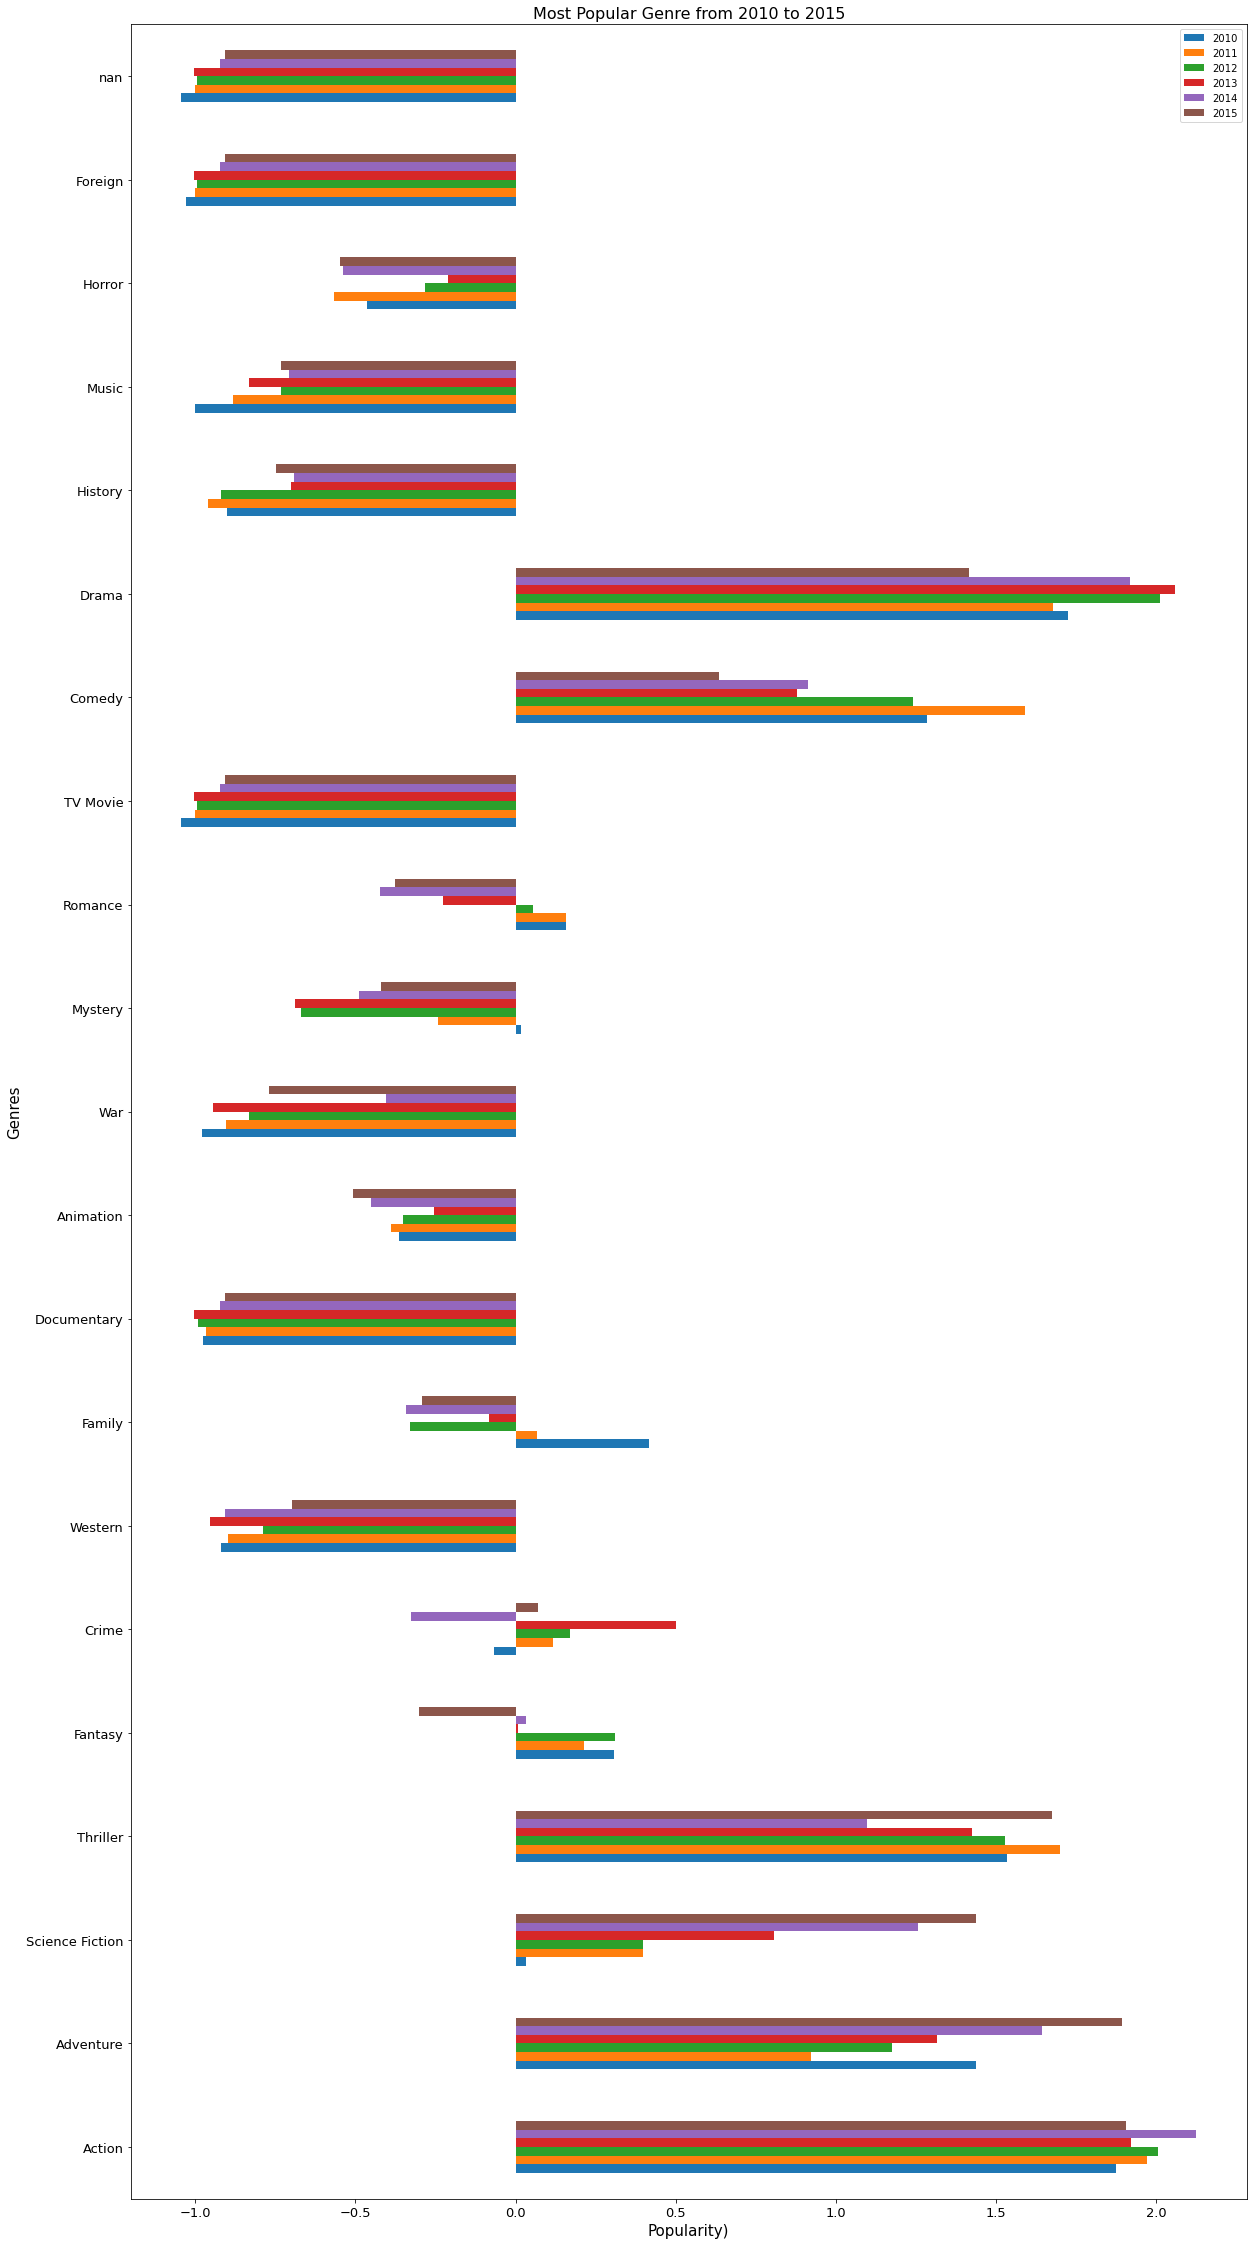

In [23]:
# the standardised data should be shown as a barh plot.
popularGenre.iloc[:,50:].plot(kind='barh',figsize = (20,40),fontsize=13)
# name the axes and title of the graph
plt.title("Most Popular Genre from 2010 to 2015",fontsize=16)
plt.xlabel("Popularity)",fontsize=15)
plt.ylabel("Genres",fontsize = 15)


#### Brief discription of the above plot
* The graph above, depicts the popularity of genres from the year 2010 to 2015.
* In 2010, action movies was more popular the others
* In 2011, action movies was more popular the others
* In 2012, drama was the most popular  
* In 2013, drama was the most popular whiles fantesy gain the lest pupolarity 
* In 2014, action movies was more popular the others
* In 2015, action movies was more popular the others

<AxesSubplot:>

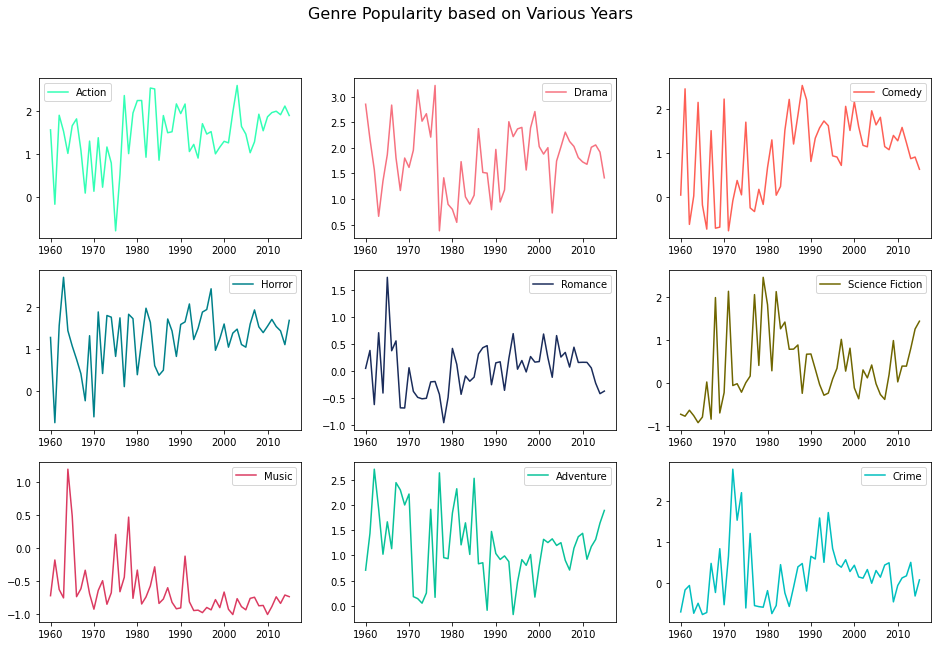

In [24]:
figure, axis = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
figure.suptitle('Genre Popularity based on Various Years',fontsize = 16)

#plot the individual genre plot to see the popularity difference yearly.
popularGenre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = axis[0][0],legend=True)
popularGenre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = axis[0][1],legend=True)
popularGenre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = axis[1][2],legend=True)
popularGenre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = axis[0][2],legend=True)
popularGenre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = axis[1][1],legend=True)
popularGenre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = axis[1][0],legend=True)
popularGenre.loc['Music'].plot(label = "Music",color='#db3b61',ax = axis[2][0],legend=True)
popularGenre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = axis[2][1],legend=True)
popularGenre.loc['Crime'].plot(label = "Crime",color='c',ax = axis[2][2],legend=True)

##### A short note on the graph above
>From 1960 to 2015, the popularity of various genres is seen in the graph above.
* It's worth noting that music's popularity peaked in 2010 and peaked in 1964, respectively.
* In terms of popularity, it grew in popularity in 2003 and peaked in 1975.
* The highest and lowest popularity for comedy were recorded in 1988 and 1971, respectively. 
* The highest and lowest popularity for drama were reported in 1976 and 1977, respectively.
* Horror films had their peak popularity in 1964 and their lowest in 1961.
* In 1965, romance was at its peak, and in 1978, it was at its lowest.
* Science fiction had its peak popularity in 1979 and its lowest in 1964; adventure had its highest popularity in 1962 and its lowest in 1964.
  

### Research Question 2  : What Characteristics Are Associated With High-Profit Movies?

> 

In [25]:
data=["id","popularity","budget","revenue","original_title","runtime","vote_average","release_year"]
xtics = pd.DataFrame(df_copied['revenue'].sort_values(ascending=False))
for i in data:
  xtics[i]=df_copied[i]

xtics.head()


,revenue,id,popularity,budget,original_title,runtime,vote_average,release_year
1386,2781505847,19995,9.432768,237000000,Avatar,162,7.1,2009
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,136,7.5,2015
5231,1845034188,597,4.355219,200000000,Titanic,194,7.3,1997
4361,1519557910,24428,7.637767,220000000,The Avengers,143,7.3,2012
0,1513528810,135397,32.985763,150000000,Jurassic World,124,6.5,2015


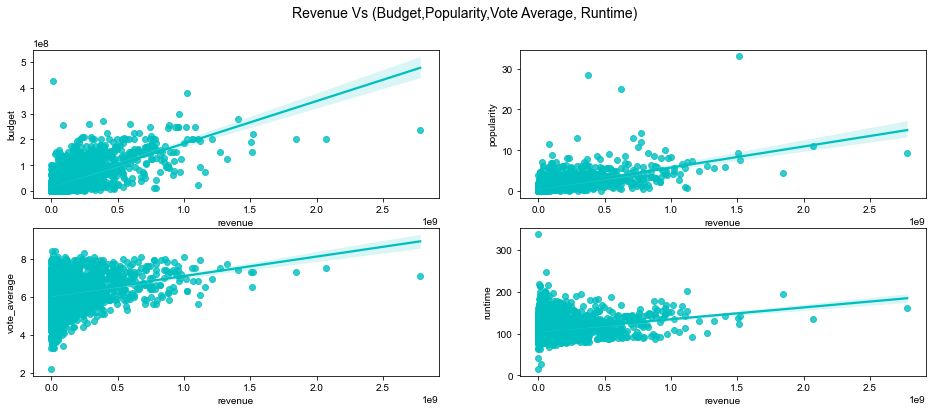

In [26]:

figure, axis = plt.subplots(2,2,figsize = (16,6))
figure.suptitle("Revenue Vs (Budget,Popularity,Vote Average, Runtime)",fontsize=14)
# scatter plot for each properties showing the relationship between them
sns.regplot(x=df_copied['revenue'], y=df_copied['budget'],color='c',ax=axis[0][0])
sns.regplot(x=df_copied['revenue'], y=df_copied['popularity'],color='c',ax=axis[0][1])
sns.regplot(x=df_copied['revenue'], y=df_copied['vote_average'],color='c',ax=axis[1][0])
sns.regplot(x=df_copied['revenue'], y=df_copied['runtime'],color='c',ax=axis[1][1])

sns.set_style("whitegrid")

In [27]:
# check if there is any zero value and replace with nan 
xtics['budget'] = xtics['budget'].replace(0,np.NAN)
xtics['revenue'] = xtics['revenue'].replace(0,np.NAN)
# calculate the correction revenue and the other properties
corr = xtics.corr()
a = corr.loc['revenue','budget']
b = corr.loc['revenue','popularity']
c = corr.loc['revenue','vote_average']
d = corr.loc['revenue','runtime']
# create a dataFrame for the correction coefficient
corr_data = pd.DataFrame(data =[a,b,c,d],index=["budget","popularity","vote_average","runtime"], columns=["revenue"])
# find the transpose of the corr_data 
corr_data.transpose()



,budget,popularity,vote_average,runtime
revenue,0.688556,0.615535,0.227123,0.250298


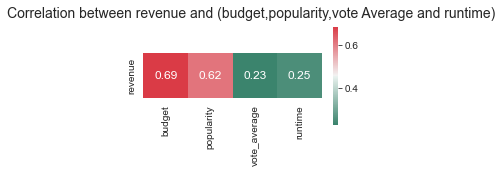

In [28]:
fig,ax = plt.subplots( figsize =( 4 , 2 ) )
fig.suptitle("Correlation between revenue and (budget,popularity,vote Average and runtime)",fontsize=14)
cmap = sns.diverging_palette( 520 , 10 , as_cmap = True )
fig = sns.heatmap(corr_data.transpose(),cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

## Explanation to the above plots

 * First Plot: Revenue Vs Budget
 >There are quite number of small movies with larger budget however the increase in revenue is a little higher. Base on the graph, there is a good probability that movies with Greta budget results in higher Revenue. correlation coefficient is 0.69
 
 *  Second Plot: Revenue Vs Popularity
 >Popularity seems to be directly proportional to Revenue.This implies that, the higher the popularity the higher the increase in revenue of the movies. they have correlation of 0.65  

* Third Plot: Revenue Vs Vote Average
>Due to the low correlation between the rating and the revenue, it can be clearly stated that vote average have no relationship or very little impact on the income of a movie. 

* Fourth Plot: Revenue Vs Runtime
>The relationship between runtime and revenue is little. Though the correlation between them is positive,that is, 0.25, it can be concluded that runtime has less effect on them revenue of the movies.

<a id='conclusions'></a>
## Conclusions

>After performing  exploratory analysis on the questions I imposed, the following is the summary of my findings: 
* Action movies gain more popularity over the year, followed by Drama and then thrillers.
* Most movies with greater budgets  and higher popularity has proving to be gain more revenues.

#### Limitations
> it was notice in the the genres column of the movies contains data the was seperated by "|" during the data cleaning stage. As a result, runtime to map the various genres to a list was much longer.

>Using the standard deviation values to represent the popularity of the genre might not be completely be accurate.If the genres of each movie were more specific, then the popularity will be more concise.